In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 一、tf.gather
# 1.收集单一维度数据
x = tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32) # 成绩册张量
print(x.shape)
print((tf.gather(x,[0,1],axis=0)).shape) # 在班级维度收集第 1~2 号班级成绩册
print((tf.gather(x,[0,3,8,11,12,26],axis=1)).shape) # 在学生维度收集第 1,4,9,12,13,27 号同学成绩
print()

# 2.收集班级和学生维度数据
students=tf.gather(x,[1,2],axis=0) # 收集第 2,3 号班级
print((tf.gather(students,[2,3,5,26],axis=1)).shape) # 收集第 3,4,6,27 号同学

(4, 35, 8)
(2, 35, 8)
(4, 6, 8)

(2, 4, 8)


In [3]:
# 二、tf.gather_nd
#抽出了班级 1 的学生 1 的科目 2、班级 2 的学生 2 的科目 3、班级 3 的学生 3 的科目 4 的成绩
x = tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32) # 成绩册张量
print(tf.gather_nd(x,[[1,1,2],[2,2,3],[3,3,4]])) 

tf.Tensor([44 68 92], shape=(3,), dtype=int32)


In [4]:
# 三、tf.boolean_mask

#采样第 1、4、5、8 门科目
x = tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32) # 成绩册张量
print(tf.boolean_mask(x,mask=[True,False,False,True,True,False,False,True],axis=2).shape)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(4, 35, 4)


In [5]:
# 四、tf.where

# 1.参数 a!=b!=None
a = tf.ones([3,3]) # 构造 a 为全 1 矩阵
b = tf.zeros([3,3]) # 构造 b 为全 0 矩阵
cond = tf.constant([[True,False,False],[False,True,False],[True,True,False]]) # 构造采样条件
print(tf.where(cond,a,b)) # 根据条件从 a,b 中采样
print()

# 2.参数 a=b=None
# a 和 b 参数不指定，tf.where 会返回 cond 张量中所有 True 的元素的索引坐标
print(tf.where(cond))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]], shape=(3, 3), dtype=float32)

tf.Tensor(
[[0 0]
 [1 1]
 [2 0]
 [2 1]], shape=(4, 2), dtype=int64)


In [6]:
# 五、tf.scatter_nd(indices, updates, shape)
# 构造需要写入的数据，4 号位写入 4.4,3 号位写入 3.3，以此类推
indices = tf.constant([[4], [3], [1], [7]])

# 在长度为 8 的全 0 向量上根据 indices 写入 updates 数据
updates = tf.constant([4.4, 3.3, 1.1, 7.7])

print(indices)
print()
print(updates)
print()
print(tf.scatter_nd(indices, updates, [8]))

tf.Tensor(
[[4]
 [3]
 [1]
 [7]], shape=(4, 1), dtype=int32)

tf.Tensor([4.4 3.3 1.1 7.7], shape=(4,), dtype=float32)

tf.Tensor([0.  1.1 0.  3.3 4.4 0.  0.  7.7], shape=(8,), dtype=float32)


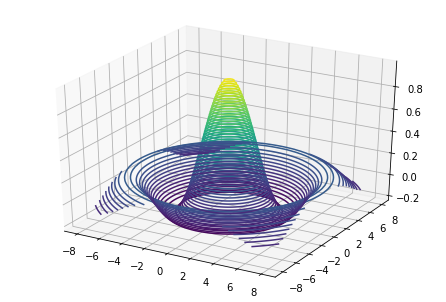

In [7]:
# 六、tf.meshgrid
x = tf.linspace(-8.,8,100) # 设置 x 轴的采样点
y = tf.linspace(-8.,8,100) # 设置 y 轴的采样点
x,y = tf.meshgrid(x,y) # 生成网格点，并内部拆分后返回
z = tf.sqrt(x**2+y**2)
z = tf.sin(z)/z # sinc 函数实现
fig = plt.figure()
ax = Axes3D(fig) # 设置 3D 坐标轴
# 根据网格点绘制 sinc 函数 3D 曲面
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()